In [9]:
#data manipulation packages
import pandas as pd
import numpy as np
import scipy
import re

#visualization tools
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 400)

In this notebook, we wil be visualizing some of the volatility and strength properties of items and categories. This will help us detect outliers and feature engineer based on strength of trend, volatility of trend, and otherwise.

In [2]:
cal = pd.read_csv('calendar.csv', parse_dates = ['date'])
sales = pd.read_csv('sales_train_validation.csv')
prices = pd.read_csv('sell_prices.csv')

In [21]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,3,0,0,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,...,5,3,1,0,0,0,1,2,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,0,3,1,1,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [3]:
item = 'FOODS_3_090_CA_3_validation'
colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
d_cols = [col for col in sales.columns if 'd_' in col]

item_df = sales.loc[sales['id'] == item][d_cols].T
item_df = item_df.rename(columns={sales.index[sales['id']==item].to_list()[0]:item}) # Name it correctly
item_df = item_df.reset_index().rename(columns={'index': 'd'}) # make the index "d"
item_df = item_df.merge(cal, how='left', validate='1:1')

cat_df = sales.loc[sales['cat_id'] == 'FOODS'][d_cols].T.mean(axis=0)

item_df.head()

,d,FOODS_3_090_CA_3_validation
0,d_1,108
1,d_2,132
2,d_3,102
3,d_4,120
4,d_5,106


One way to detect outliers is through the use of bollinger bands - bands two standard deviations above and below the item's window mean. Those that are outside the bands will be deamed outliers.

In [649]:
def bollinger_bands(item):
    '''bollinger bands around the 50-day rolling mean items sold per day for specified item.
    Args:
        item(str): id of the item we are wanting to plot.
    
    Returns:
        line plot of item sale history as well as 50-day rolling standard deviation of the time series (2):
    '''
    item_df = sales.loc[sales['id'] == item][d_cols].T
    item_df = item_df.rename(columns={sales.index[sales['id']==item].to_list()[0]:item}) # Name it correctly
    item_df = item_df.reset_index().rename(columns={'index': 'd'}) # make the index "d"
    item_df['mean'] = item_df[item].rolling(window=50).mean()
    item_df['std'] = item_df[item].rolling(window=50).std()
    item_df['upper_band'] = item_df['mean'] + (item_df['std'] * 2)
    item_df['lower_band'] = item_df['mean'] - (item_df['std'] * 2)
    
    item_df[[item, 'mean', 'upper_band', 'lower_band']].plot(figsize=(12,6))
    plt.grid(linestyle='-', linewidth='1')
    plt.title('30 Day Bollinger Band for {}'.format(item))
    plt.ylabel('Items Sold')
    plt.show()

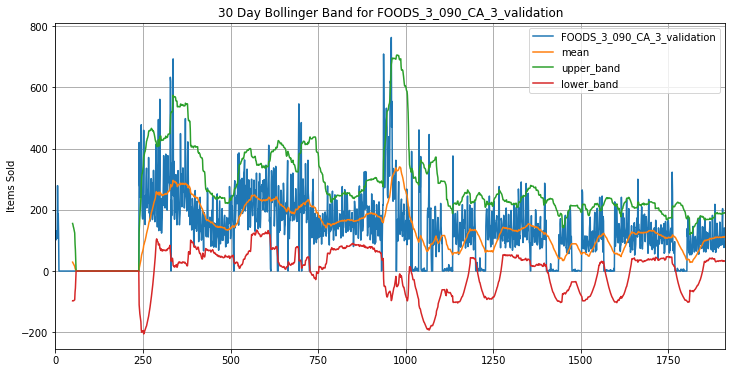

In [650]:
bollinger_bands(item)

Another metric we can plot out is the item's relative strength, which shows how well the item is selling within its window. Relative strength is the percentage of days that experienced higher selling than the previous day to the percentage of that experience lower selling than the previous day.

In [647]:
def RSI(item, window, category=False):
    '''Relative strength of specified item compared to the average relative strength of all items in its category.
    
    Args:
        item(str): id of the item we are wanting to plot.
        window(int): number of days we want to average over.
        category(bool): whether or not we are finding the RS of an item or a category.
    
    Returns:
        Relative strength of item or category.
    '''
    if category == True:
        category = sales.loc[sales['id']==item]['cat_id']
        series = sales.loc[sales['cat_id'].isin(category)][d_cols].mean(axis=0).T
    else:
        series = sales.loc[sales['id'] == item][d_cols].T
    
    # Get the difference in price from previous step
    delta = series.diff().dropna()
    # Get rid of the first row, which is NaN since it did not have a previous 
    # row to calculate the differences
    delta = delta[1:] 

    # Make the positive gains (up) and negative gains (down) Series
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    # Calculate the EWMA
    roll_up1 = up.ewm(span=window).mean()
    roll_down1 = down.abs().ewm(span=window).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))

    # Calculate the SMA
    roll_up2 = up.rolling(window).mean()
    roll_down2 = down.abs().rolling(window).mean()

    # Calculate the RSI based on SMA
    RS2 = roll_up2 / roll_down2
    RSI2 = 100.0 - (100.0 / (1.0 + RS2))

    # Compare graphically
    fig, axes = plt.subplots(1, 1, figsize=(15, 6), dpi=100)
    RSI1.plot(ax=axes, label='EWMA of Item Sold', alpha=0.8).set_ylabel('RS Index', fontsize=14)
    RSI2.plot(ax=axes, label='SMA of Item Sold', alpha=0.8).set_ylabel('RSI Index', fontsize=14)
    axes.set_title('Relative Strength (using EWMA and SMA) of Item', fontsize=16);
    axes.grid(linestyle='-', linewidth='1')
    axes.legend(['RSI via EWMA', 'RSI via SMA'])

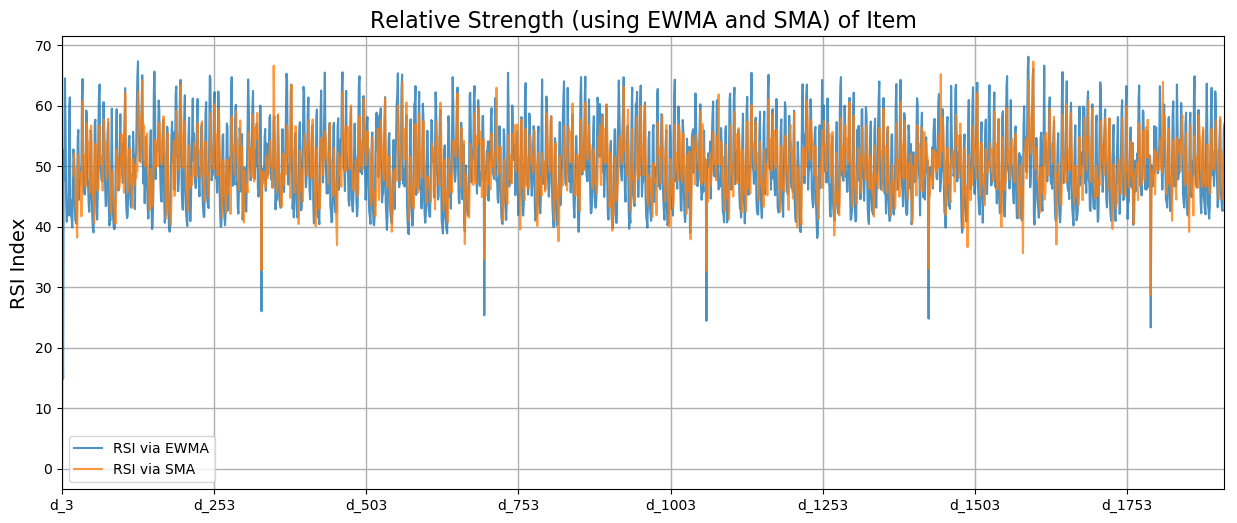

In [667]:
RSI(item, 20, category=True)

To get really familiar with the items' properties, we can plot a Relative Rotation Graph. This locates the an item's relative strength and momentum from one period to another, and is compared to those properties of the benchmark (item's category aggregated stats). The direction of the property is important; each quadrant illustrates if the item's selling history is leading, lagging, weakening, or improving. The ideal formation is that the item's relative strength and momentum are both above 100, and is heading in the direction of the leading quadrant. The graph created below should help clarify.

In [663]:
def RRG(item_cat, window):
    '''Relative Rotation Graph (RRG) of a sample of items and its categories. RRGs are made 
    of an item's/category's relative strength and momentum.
    
    Args:
        item(str): id of the item we are wanting to plot.
        window(int): window to to roll over.
    
    Returns:
        RRG of item nad it's category. This RRG takes advantage of a simple moving average.
    '''
    colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    
    category = sales.loc[sales['id']==item_cat]['cat_id']
    benchmark = sales.loc[sales['cat_id'].isin(category)][d_cols].mean(axis=0).T
    benchmark = pd.DataFrame({'mean_values':benchmark.values})
    
    
    # Get the difference in price from previous step
    benchmark_delta = benchmark.diff().dropna()
    # Get rid of the first row, which is NaN since it did not have a previous 
    # row to calculate the differences  
    benchmark_delta = benchmark_delta[1:]
    # Make the positive gains (up) and negative gains (down) Series
    b_up, b_down = benchmark_delta.copy(), benchmark_delta.copy()
    b_up[b_up < 0] = 0
    b_down[b_down > 0] = 0
    
    #Calculate SMA
    b_roll_up2 = b_up.rolling(window).mean()
    b_roll_down2 = b_down.abs().rolling(window).mean()  

    b_RS2 = b_roll_up2 / b_roll_down2
#     b_RSI2 = 100.0 - (100.0 / (1.0 + b_RS2))
    benchmark['jdk_rs'] = 100 + ((b_RS2 - b_RS2.mean()) / b_RS2.std() + 1)
    
    b_mom = benchmark.iloc[:,0].diff(periods = window)
    benchmark['jdk_mom'] = 100 + ((b_mom - b_mom.mean()) / b_mom.std() + 1)
    
    
    #Repeat steps for a sample of items in that category
#     series_sample = sales.loc[sales['cat_id'].isin(category)]['id'].sample(sample)#grab sample of items
    
    series = sales.loc[sales['id'] == item][d_cols].T

    # Get the difference in price from previous step
    item_delta = series.diff().dropna()

    item_delta = item_delta[1:] 

    # Make the positive gains (up) and negative gains (down) Series
    i_up, i_down = item_delta.copy(), item_delta.copy()
    i_up[i_up < 0] = 0
    i_down[i_down > 0] = 0

    # Calculate the EWMA
#     roll_up1 = up.ewm(span=window).mean()
#     roll_down1 = down.abs().ewm(span=window).mean()

#     # Calculate the RSI based on EWMA
#     RS1 = roll_up1 / roll_down1
#     RSI1 = 100.0 - (100.0 / (1.0 + RS1))

    # Calculate the SMA
    i_roll_up2 = i_up.rolling(window).mean()
    i_roll_down2 = i_down.abs().rolling(window).mean()

    # Calculate the RSI based on SMA
    i_RS2 = i_roll_up2 / i_roll_down2
#     i_RSI2 = 100.0 - (100.0 / (1.0 + i_RS2))
    series['jdk_rs'] = 100 + ((i_RS2 - i_RS2.mean()) / i_RS2.std() + 1)

    i_mom = series.iloc[:,0].diff(periods = window)

    series['jdk_mom'] = 100 + ((i_mom - i_mom.mean()) / i_mom.std() + 1)
    
    from scipy.interpolate import interp1d
    from matplotlib.patches import ConnectionPatch, FancyArrowPatch
    
    ix = series.iloc[::220]['jdk_rs'].values
    iy = series.iloc[::220]["jdk_mom"].values
    
    bx = benchmark.iloc[::150, benchmark.columns.get_loc("jdk_rs")].values
    by = benchmark.iloc[::150, benchmark.columns.get_loc("jdk_mom")].values
    
    improving_lagging = np.linspace(94,       
                     100, 
                     1000)
    leading_weaking = np.linspace(100,       
                     106, 
                     1000)

    
    b_origin=(bx[-2],by[-2])
    bxy =(bx[-1],by[-1])

    i_origin=(ix[-2],iy[-2])
    ixy =(ix[-1],iy[-1])

    #plotting RRG in steps of 150 days
    fig, axes = plt.subplots(1,1, figsize=(25,10), dpi=100)
    plt.scatter(bx,by, marker='o', label='Benchmark', color='red')
    plt.scatter(ix,iy, marker='o', label = 'Item', color=next(colors))
    axes.set_axisbelow(True)
    axes.grid(linestyle='-', linewidth='2.0')
    plt.xlim(95,105)
    plt.ylim(95,105)
    plt.axhline(100, linewidth=4, color='b')  #horizontal line
    plt.axvline(100, linewidth=4, color='b')
    plt.gca().fill_between(improving_lagging, 
                           100, 
                           106.5, 
                           alpha=0.1, color='b', zorder=3, label='Improving')
    plt.gca().fill_between(leading_weaking, 
                           100, 
                           106.5, 
                           alpha=0.1, color='g', zorder=4, label='Leading')
    plt.gca().fill_between(leading_weaking, 
                           94, 
                           100, 
                           alpha=0.1, color='y', zorder=5, label='Weakening')
    plt.gca().fill_between(improving_lagging, 
                           94, 
                           100, 
                           alpha=0.1, color='r', zorder=6, label='Lagging')
    plt.quiver(b_origin[0], b_origin[1], bxy[0]-b_origin[0], bxy[1]-b_origin[1],
               scale_units='xy', angles='xy',alpha=.9, scale=1, pivot='tip', width=.0025, headlength = 4.5, headwidth=3, color='maroon')
    plt.quiver(i_origin[0], i_origin[1], ixy[0]-i_origin[0], ixy[1]-i_origin[1],
               scale_units='xy', angles='xy',alpha=.9, scale=1, pivot='tip', width=.0025, headlength = 4.5, headwidth=3, color='royalblue')
    plt.xlabel('JDK Relative Strength', fontsize=14)
    plt.ylabel('JDK Momentum', fontsize=14)
    plt.legend(fontsize='xx-large')
    plt.title('Relative Rotation Graph for Item Category', fontsize=25)

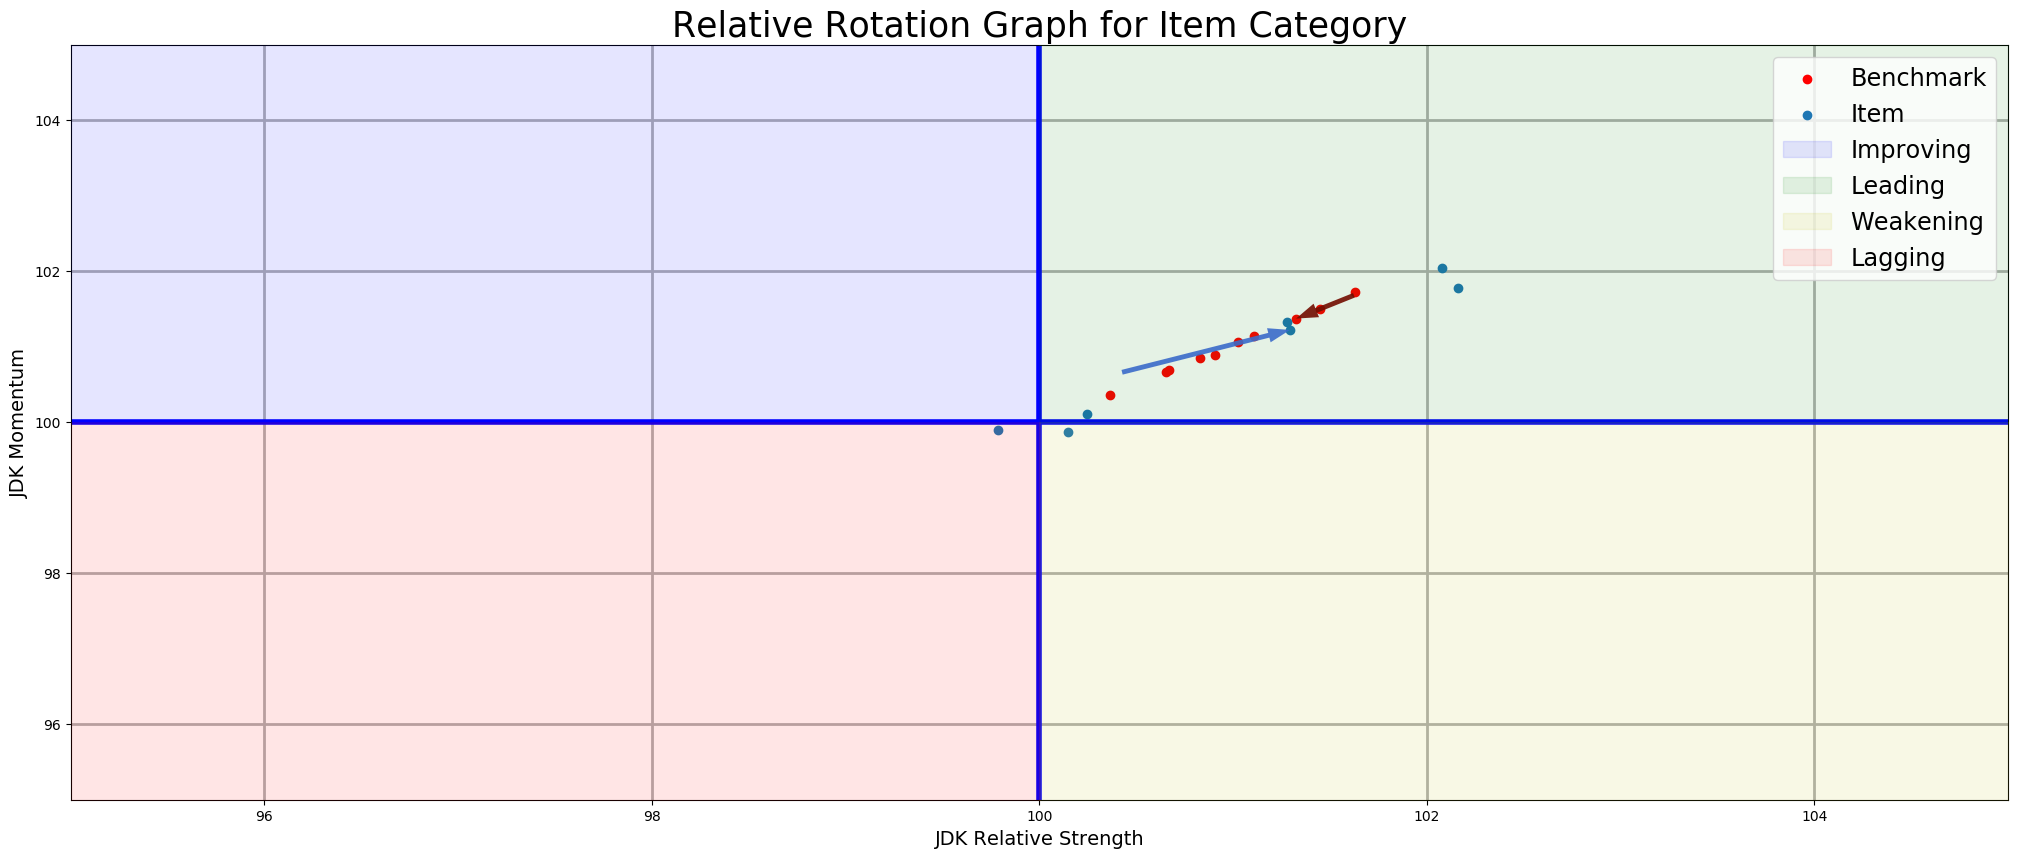

In [664]:
RRG('FOODS_3_090_CA_3_validation', 350)

In the above example, we can see that this particular item is performing on par with its benchmark, although the direction that it's heading in is not ideal.

Text(0.5, 1.0, 'HOBBIES_1_004_CA_1_validation Average True Range (ATR)')

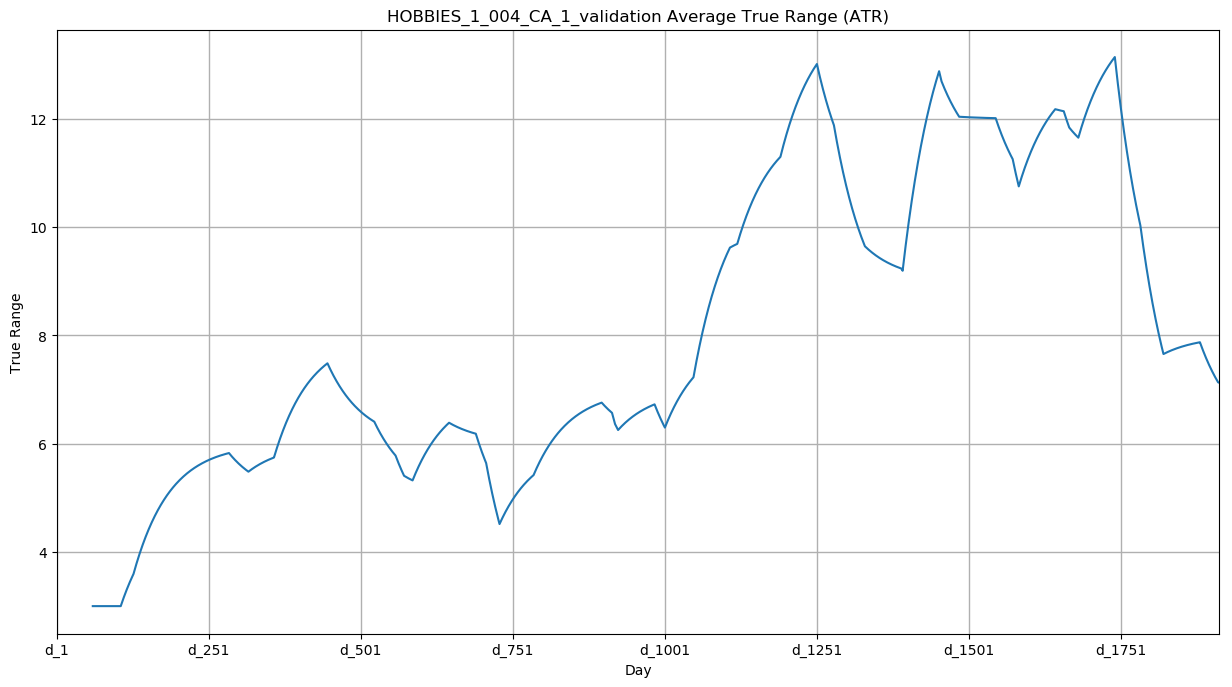

In [723]:
#Volatility measure
def wwma(values, window):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/window, adjust=False).mean()

def ATR(item, window):
    
    item_df = sales.loc[sales['id'] == item][d_cols].T
    item_wwma = item_df.ewm(alpha=1/window, adjust=False).mean() #Wilder's EMA
        
    high = item_df.rolling(window).max()
    low = item_df.rolling(window).min()
    close = item_df.rolling(window).mean()
    item_df['tr0'] = abs(high - low)
    item_df['tr1'] = abs(high - close.shift())
    item_df['tr2'] = abs(low - close.shift())
    tr = item_df[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = wwma(tr, window)
    return atr
    



item = 'HOBBIES_1_004_CA_1_validation'

item_atr = ATR(item, 60)

fig, axes = plt.subplots(1,1, figsize=(15,8), dpi=100)
item_atr.plot()
axes.grid(linestyle='-', linewidth='1.0')
plt.xlabel('Day')
plt.ylabel('True Range')
plt.title('%s Average True Range (ATR)'% item)

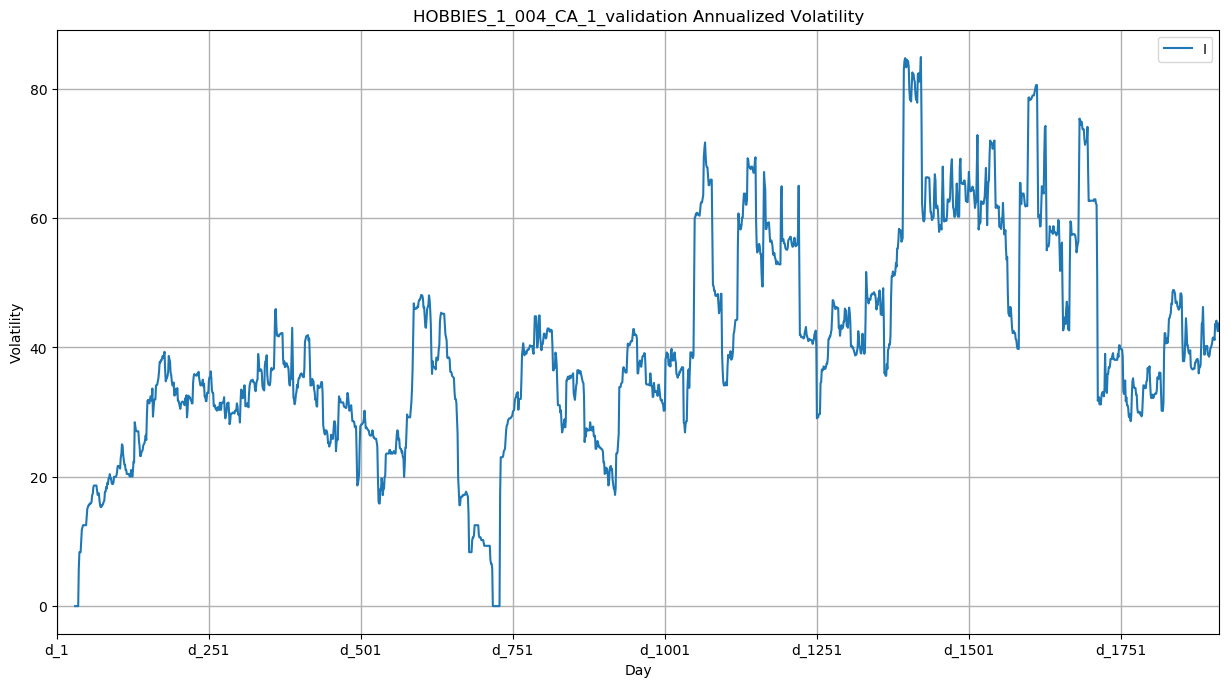

In [727]:
def annualized_volatility(item, window):
    "Return the annualized stddev of daily log returns of item."
    
    item_df = sales.loc[sales['id'] == item][d_cols].T
    
    return item_df.diff().rolling(window).std()*(252**0.5)

item_ann = annualized_volatility(item, 30)

fig, axes = plt.subplots(1,1, figsize=(15,8), dpi=100)
item_ann.plot(ax=axes)
axes.grid(linestyle='-', linewidth='1.0')
plt.xlabel('Day')
plt.ylabel('Volatility')
plt.title('%s Annualized Volatility'% item)
plt.legend(item)
plt.show()